<a href="https://colab.research.google.com/github/Hannah1123/UTS_ML2019_ID13135684/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction  


Personalized Recommender Systems have become a part of modern life. In this era, both information consumers and information producers have encountered great challenges. It is very difficult to find the information of interest from a large amount of information for an information consumer and it is also not easy for an information producer to make information stand out and be concerned by users.  
The recommendation system is an important tool to resolve this contradiction.The tasks of the recommendation system are to contact users and information and help users find information that is valuable to them. On the other hand, the  information is presented to users who are interested in it. Therefore, a win-win situation for information consumers and information producers is achieved.  
The personalized recommendation system enhances the relationship between the user and the content, which is a bridge between them. Based on the user's interest preference, items or videos, information, etc. which are interested by the user, are recommended to the user, giving the user an immersive experience, allowing the user to feel a certain satisfaction and optimizing the experience.



#Exploration 


In this project, a recommendation model based on K-Means clustering are designed using a dataset which contains information of 73,516 user's preference on 12,294 anime. Using this dataset, a recommendation system will be implemented based on clustering. The result of this model is that data points would be classified into several groups and then an anime would be selected randomly from one of the clustering group to recommend to a user belongs to the specific group.  
Firstly, data wrangling would be done for exploring the dataset. since the dataset is large, to reduce the running time, the size of users data has been reduced.  
There are seven columns in anime dataset, which are anime_id, name, genre, type, episodes, rating and members. User_id, anime_id and rating are included in the users' table. To distinguish the final rating of each anime in the anime table and the rating of the specific user in the users' table, the latter is renamed as userRating. Since rating mean of each user is quite different, to use the average of all rating as a demarcation point of whether the user like the anime is not rigorous. Therefore, the rating mean of each user are calculated as mean_rating. An anime whose rating is higher than the mean_rating will assign as like.    
After that, two dataframes are merged into one dataframe with 10 columns with the same anime_id and a crosstable which shows the detail of users and the anime they like is generated base on 'user_id' and 'name' of anime.  
Principal component analysis(PCA) is used to reduce the data dimensions and then K-Means clustering is used to implement the classification.  
A challenge of this project is to sperate the data set into a training data set and a test data set. the test data set should be divided from each user. For example, if a user has rate 100 anime, 70 of them can be training data, and the rest of them can be test data. however, it is not easy to implement it. in this project, I have not implement it.


#Code of Exploration

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [0]:
link1 = 'https://drive.google.com/open?id=1esc5sZH_R6DM0jcU927qfUkKwB9-TYOa'

In [4]:
fluff, id = link1.split('=')
print (id)

1esc5sZH_R6DM0jcU927qfUkKwB9-TYOa


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
anime = pd.read_csv('Filename.csv')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving rating.csv to rating.csv


In [0]:
import io
user = pd.read_csv(io.BytesIO(uploaded['rating.csv']))

In [8]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
user.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [10]:
len(anime)

12294

In [11]:
len(user)

7813737

In [12]:
user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [13]:
user[user['user_id']==5].rating.mean()

4.263383297644539

In [14]:
user.rating.mean()

6.144029546937656

In [0]:
mean_of_each = user.groupby(['user_id']).mean().reset_index()
mean_of_each['mean_rating'] = mean_of_each['rating']

mean_of_each.drop(['anime_id','rating'],axis=1, inplace=True)

In [16]:
mean_of_each.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [0]:
user = pd.merge(user,mean_of_each,on=['user_id','user_id'])

In [18]:
user.head()

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [0]:
user_like = user.drop(user[user.rating < user.mean_rating].index)

In [20]:
user_like[user_like['user_id']== 1].head(10)

# only 4 animes in user 1 favorite

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [21]:
user_like[user_like['user_id']== 5].head(10)

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383
305,5,18,6,4.263383
306,5,20,6,4.263383
307,5,22,5,4.263383
310,5,45,7,4.263383
311,5,47,8,4.263383
312,5,57,7,4.263383
314,5,67,6,4.263383


In [22]:
user_like["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516])

In [23]:
len(user_like)

4262566

In [0]:
user_like = user_like.rename({'rating':'userRating'}, axis='columns')

reduce dataset  
merge 2 dataset

In [25]:
combidata = pd.merge(anime,user_like,on=['anime_id','anime_id'])
combidata= combidata[combidata.user_id <= 20000]
combidata.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298


In [26]:
len(combidata['anime_id'].unique())

7852

In [27]:
combidata['name'].value_counts()

Death Note                                                                                         8345
Shingeki no Kyojin                                                                                 6893
Code Geass: Hangyaku no Lelouch                                                                    6093
Fullmetal Alchemist: Brotherhood                                                                   5869
Sword Art Online                                                                                   5832
Code Geass: Hangyaku no Lelouch R2                                                                 5508
Angel Beats!                                                                                       5495
Toradora!                                                                                          4920
Steins;Gate                                                                                        4741
Fullmetal Alchemist                                             

In [28]:
len(anime['anime_id'].unique())

12294

crosstable: show anime that are liked by each user

In [29]:
user_anime = pd.crosstab(combidata['user_id'], combidata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai. 2nd Season,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,1989,20-dai no Heya-hen,2005-nen Uchuu no Tabi,...,Zoids,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Halloween☆Special Movie!,Zonmi-chan: Meat Pie of the Dead,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,_Summer Specials,eX-Driver,eX-Driver the Movie,eX-Driver the Movie Specials,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
len(user_anime)

20000

#Methodology  


Principal Component Analysis(PCA) is a data analysis method which is commonly used. PCA transforms the original data into a set of linearly independent representations of each dimensions through linear transformation, which can be used to extract the main feature components of the data and reduce dimensions of high-dimensional data.  
K-Means clustering is also popular in data mining for clustering analysis. The purpose of K-Means is to partition a set of observations into k clusters.   
The process of K-Means cluster is not complicated. In a set of data points in a n-dimensional space, k cluster center points are randomly generated, and then the distance from each data point to the center point is calculated separately. according to the distance, the center point with the shortest distance is regarded as the data point's group. After that, for a certain center point, find each data point belonging to its group, and change the coordinates of the center point to the center of these data points based on euclidean metric. Then, the distance from each data point to the center point is calculated again and repeat the following steps. After several times adjustment, when the coordinates of the center points do not change anymore, the algorithm converges.  
Through this section, the data set will be grouped into 4 clusters. In the next section, each clustering will be analysis. Top 15 anime will be selected to describe the characteristic of the cluster and to be visualized based on their 'genre'.

#Code of Methdology

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [32]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415768
1,-1.773553,-0.272593,0.116391
2,0.218814,-1.232282,-0.985785
3,0.199435,-0.291005,0.681061
4,3.532125,-0.184796,-0.743313


visualisation

In [0]:
tocluster = pd.DataFrame(ps[[0,1,2]])

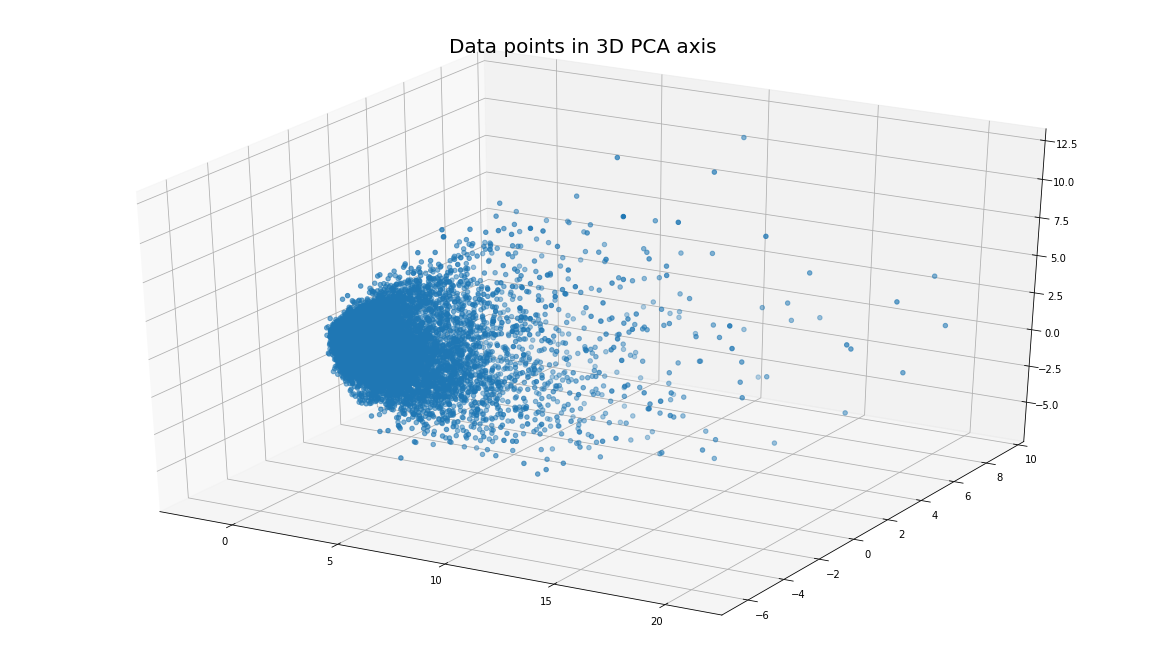

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

KMeans---- deciding K

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

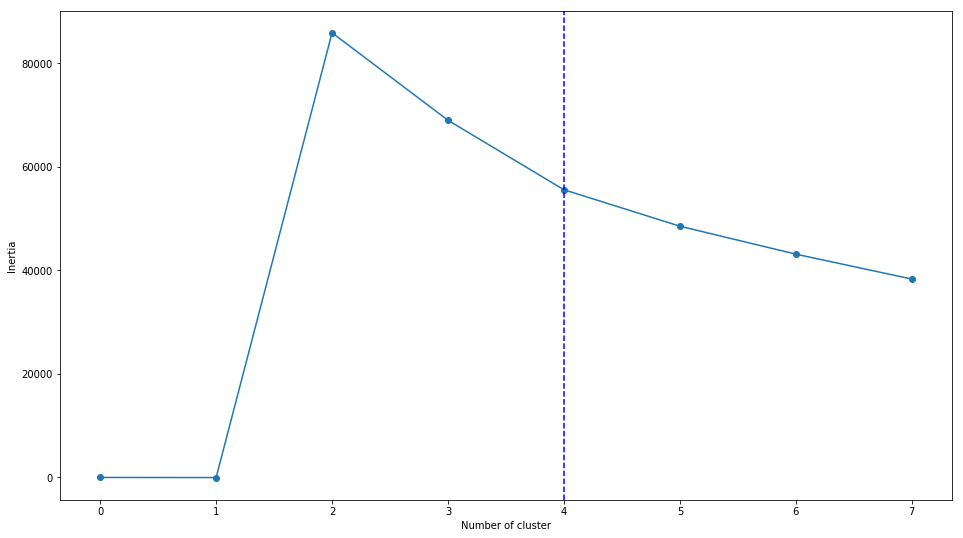

In [36]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

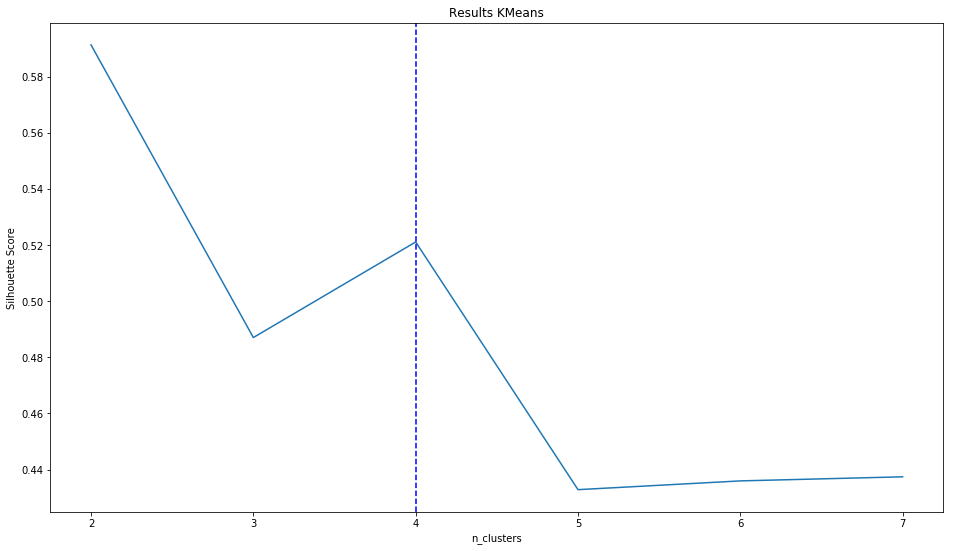

In [37]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [38]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.08874971 -0.04026583  0.06666459]
 [ 7.61700382 -0.64256847  0.83955519]
 [ 1.6784451   2.31533839 -0.02522805]
 [ 1.97875213 -1.1265422  -0.43514649]]


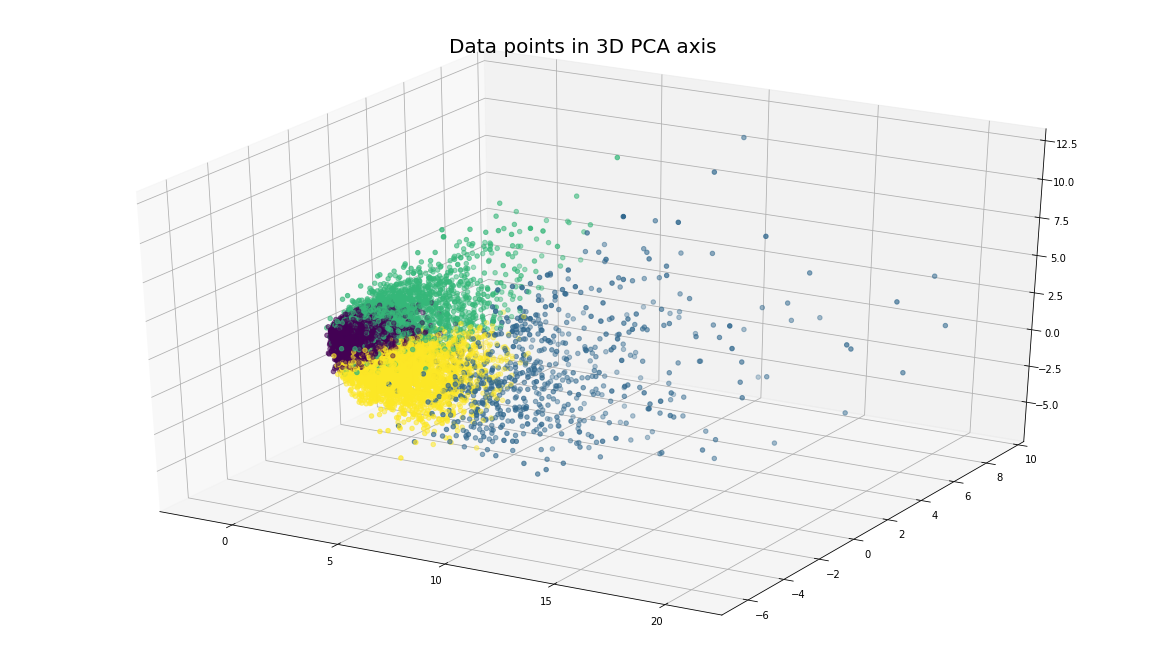

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

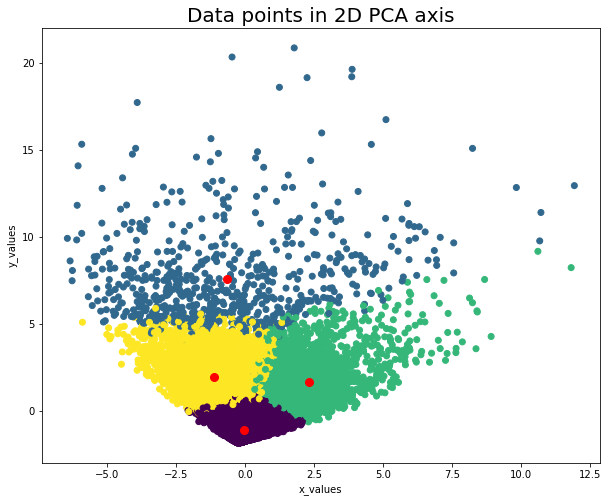

In [40]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [41]:
user_anime['cluster'] = c_preds


user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai. 2nd Season,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,1989,20-dai no Heya-hen,2005-nen Uchuu no Tabi,...,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Halloween☆Special Movie!,Zonmi-chan: Meat Pie of the Dead,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,_Summer Specials,eX-Driver,eX-Driver the Movie,eX-Driver the Movie Specials,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Evaluation  
Report Execution on Data;  
Perform and Report Testing;  
Perform Efficiency Analysis;  
Do Possible Comparative Study  
W-200

The result can be showed in the figure. There are 4 clustering named 'c0', 'c1', 'c2' and 'c3'. In each cluster, we can find the frequent words which come from 'genre'. A visualization is implemented to show the result clearly. For cluster 'c0', 'Action' appeared 10 times among the top 15 anime, followed by 'Drama' with 8 times and 'Fantasy','Supernatural', 'Romance' With 5 times respectively. The average episode of the anime in this cluster is 38 and the average rating is 7.87 rated by 668177 members.  
As for cluster 'c1', 'Drama', 'Romance', 'School', 'Action' and 'Comedy' are the keywords. The average episode of the anime in this cluster is 23 and the average rating is 8 rated by 647913 members.  
About cluster 'c2', 'Action',  'Drama', 'Sci-Fi', 'Adventure' and 'Military' are the keywords. The average episode of the anime in this cluster is 24 and the average rating is 8 rated by 561513 members.  
About cluster 'c3', 'Action','Supernatural', 'Drama', 'Fantasy' and 'Super power' are the keywords which is similar to 'c0', while the average episode is 23 much lower than 38 and the average rating is 8 rated by 687956 members.

#Code of Evaluation

In [0]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [43]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.320642
Shingeki no Kyojin                    0.230444
Sword Art Online                      0.198824
Fullmetal Alchemist: Brotherhood      0.181616
Code Geass: Hangyaku no Lelouch       0.178820
Sen to Chihiro no Kamikakushi         0.159963
Angel Beats!                          0.157095
Fullmetal Alchemist                   0.155661
Code Geass: Hangyaku no Lelouch R2    0.153510
Naruto                                0.146125
Elfen Lied                            0.144045
Ouran Koukou Host Club                0.133792
Mirai Nikki (TV)                      0.121388
Toradora!                             0.117803
Howl no Ugoku Shiro                   0.114433
dtype: float64

In [0]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [0]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [0]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [0]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [0]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

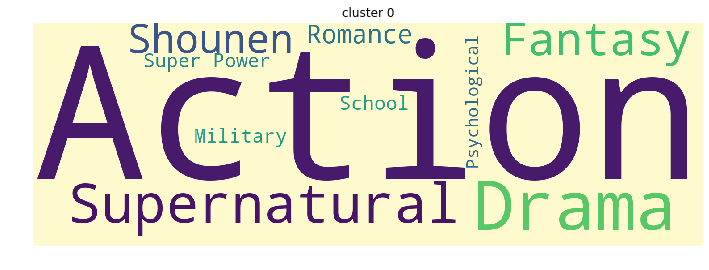

In [49]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [50]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


In [51]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Supernatural', 5],
 [' Fantasy', 5],
 [' Shounen', 5]]

In [52]:
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.836524
No Game No Life                                        0.818851
Toradora!                                              0.815906
Code Geass: Hangyaku no Lelouch                        0.804124
Steins;Gate                                            0.792342
Shingeki no Kyojin                                     0.783505
Code Geass: Hangyaku no Lelouch R2                     0.777614
Sword Art Online                                       0.768778
Bakemonogatari                                         0.756996
Death Note                                             0.755523
Hataraku Maou-sama!                                    0.730486
Fullmetal Alchemist: Brotherhood                       0.730486
Clannad                                                0.724595
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.720177
Chuunibyou demo Koi ga Shitai!                         0.718704
dtype: float64

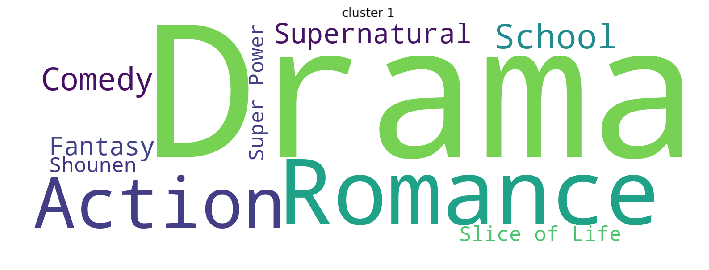

In [53]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [54]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


In [55]:
c2.sort_values(ascending=False)[0:15]

name
Death Note                            0.680644
Code Geass: Hangyaku no Lelouch       0.668454
Code Geass: Hangyaku no Lelouch R2    0.609459
Fullmetal Alchemist                   0.600195
Sen to Chihiro no Kamikakushi         0.583618
Suzumiya Haruhi no Yuuutsu            0.551438
Neon Genesis Evangelion               0.537786
Tengen Toppa Gurren Lagann            0.529498
Cowboy Bebop                          0.525110
Fullmetal Alchemist: Brotherhood      0.509995
Mononoke Hime                         0.499756
Toradora!                             0.489030
Elfen Lied                            0.484154
Howl no Ugoku Shiro                   0.479766
Samurai Champloo                      0.477328
dtype: float64

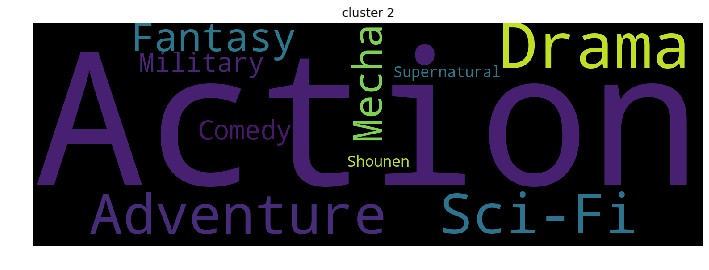

In [56]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [57]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


In [58]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.726753
No Game No Life                                             0.644598
Sword Art Online                                            0.613602
Angel Beats!                                                0.598255
Death Note                                                  0.591032
Steins;Gate                                                 0.551610
Fullmetal Alchemist: Brotherhood                            0.539874
Toradora!                                                   0.517605
Mirai Nikki (TV)                                            0.513993
Code Geass: Hangyaku no Lelouch                             0.506169
Code Geass: Hangyaku no Lelouch R2                          0.478182
Noragami                                                    0.464941
One Punch Man                                               0.464039
Tokyo Ghoul                                                 0.462534
Ano Hi Mita Hana no Namae wo 

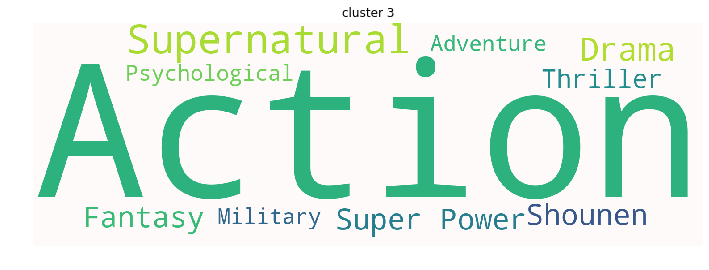

In [59]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [60]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


#Conclusion  


This model is a basic recommendation system based on clustering. Meanwhile, this model is a recommendations system based on content, through the similarity between anime to achieve recommendations.
In this project, Item-based Collaborative Filtering Recommendation can also be assigned. Based on the evaluation of the item or information by all users, the similarity between the items is found, and then similar items are recommended to the user according to the user's historical preference information. User-based Collaborative Filtering Recommendations can also be used. The technology first uses statistical techniques to find neighbors who have the same preferences with the target users, and then generates recommendations to the target users based on the preferences of the neighbors. The basic principle is to use the similarity of user's access behaviors to recommend resources that users might be interested in.

#Ethical  


Big data technology is a "double-edged sword" that can both serve  human and bring troubles to human. Some shopping platform claim to be consumer-centric company, its shopping recommendation system has been biased towards its own and its partners' products, even if the prices of other sellers' products are lower. Elsagate happened in YouTube in 2016, which refers to the event featured a large number of videos that were not suitable for children to watch on children's channel. The YouTube recommendation algorithm consists of two neural networks. The first is to generate a candidate set that takes the user's viewing history as input and uses a collaborative filtering algorithm to select among hundreds of videos. The second neural network is used to sort hundreds of videos. The system uses logistic regression to calculate the score for each video and then continuously improves it. Using these features of the YouTube algorithm, the beneficiary behind these videos let the algorithm automatically determine the their videos as a child's video by tagging the names using a large number of anime characters, funny, children, etc.As a result, these videos which are not suitable for children to watch will appear in the top of the recommended rankings. Once children click one of them, the website will recommend the same type of video to play one by one. This is really a terrible thing when children watch these videos unsupervised.  
The recommendation system benefits platforms a lot, but correspondingly platforms need to be supervised for the indulgences for the contents which violate social ethics and moral, as well as the search results which are guided. In my opinion, since technology is only a tool, what it does depends on how human use it.
